<h1> Applied Statistics - Project </h1>

<h3> Learning Outcome </h3>

<ul>
    <li>Exploratory Data Analysis</li>
    <li>Practicing statistics using Python</li>
    <li>Hypothesis testing</li>
</ul>


<h3> The Dataset </h3>

The data at hand contains medical costs of people characterized by attributes like age, gender, body mass index, number of dependents, smoker or not and Residential area.


<h4> Import the necessary libraries </h4>

In [1]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

<h4> Read the data as a data frame </h4>

In [2]:
userData = pd.read_csv('insurance.csv')
userData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h3> Basic Exploratory Data Analysis </h3>

<h4> Shape of the data </h4>

In [3]:
dataShape = userData.shape
dataShape

(1338, 7)

<h4> Data type of each attribute </h4>

In [4]:
dataDescription = userData.info()
dataDescription

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h4> Checking the presence of missing values </h4>

In [5]:
#Checking for null values column wise

nullValues = userData.isnull()
nullValues

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
#Checking the number of null values in each column

numberOf_nullValues = userData.isnull().sum()
numberOf_nullValues

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Based on the above data, there are no null values in the dataset.

<h4> 5 point summary of numerical attributes </h4>

In [7]:
fivePointSummary = userData.describe()
fivePointSummary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


NB: Here describe() shows minimum, maximum, Q1(25%), Q2(50%) and Q3(75%) - which forms the five point summary

<h4> Distribution of 'bmi', 'age' and 'charges' </h4>

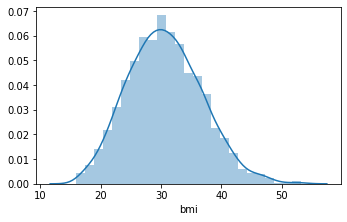

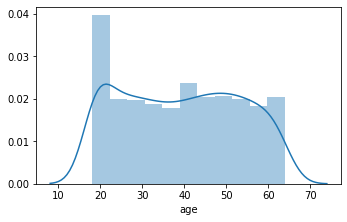

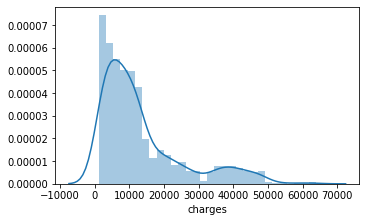

In [8]:
#BMI Histogram
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
sns.distplot(userData['bmi'])

#Age Histogram
plt.figure(figsize=(12,15))
plt.subplot(4,2,2)
sns.distplot(userData['age'])

#Charges Histogram
plt.figure(figsize=(12,15))
plt.subplot(4,2,3)
sns.distplot(userData['charges'])

<h4> Measure of skewness of 'bmi', 'age' and 'charges' </h4>

In [9]:
bmiSkew = skew(userData["bmi"])
print("Measure of skewness of BMI: " + str(round(bmiSkew,4)) + "\n")

ageSkew = skew(userData["age"])
print("Measure of skewness of Age: " + str(round(ageSkew,4)) + "\n")

chargesSkew = skew(userData["charges"])
print("Measure of skewness of Charges: " + str(round(chargesSkew,4)) + "\n")

Measure of skewness of BMI: 0.2837

Measure of skewness of Age: 0.0556

Measure of skewness of Charges: 1.5142



<h4> Checking the presence of outliers in 'bmi', 'age' and 'charges' </h4>

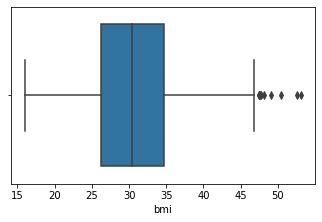

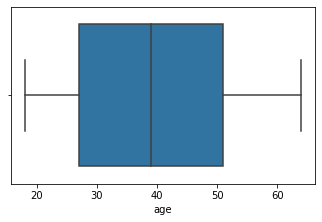

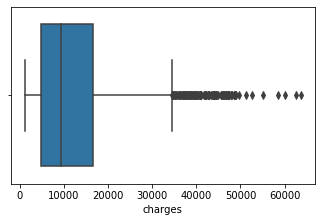

In [10]:
#BMI Boxplot
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
sns.boxplot(userData['bmi'])

#Age Boxplot
plt.figure(figsize=(12,15))
plt.subplot(4,2,2)
sns.boxplot(userData['age'])

#Charges Boxplot
plt.figure(figsize=(12,15))
plt.subplot(4,2,3)
sns.boxplot(userData['charges'])


* From the box-plot of 'BMI', it's evident that there are some outliers and the distribution is skewed slightly towards right.
* From the box-plot of 'age', it's evident that there are no outliers.
* From the box-plot of 'charges', it's very clear that there are many outliers. This makes the distribution a right-skewed one.

<h4> Distribution of categorical columns (Include children) </h4>

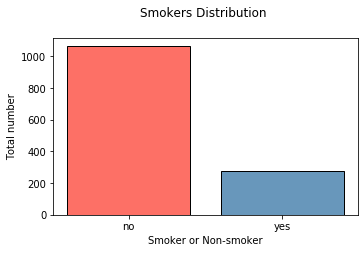

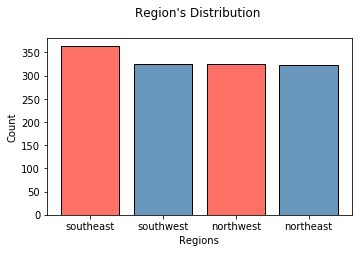

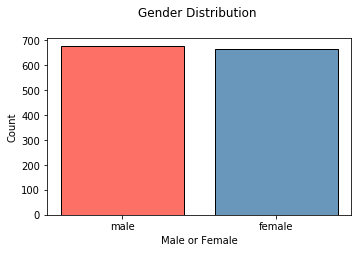

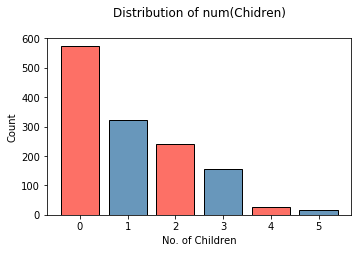

In [11]:
#Smoker's Distribution

x_smoker = userData['smoker'].value_counts().index
y_smoker = [userData['smoker'].value_counts()[i] for i in x_smoker]

plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
plt.bar(x_smoker, y_smoker, align='center', color = ['#fd7066', '#6897bb'], edgecolor = 'black')

plt.xlabel('Smoker or Non-smoker')
plt.ylabel('Total number')
plt.title('Smokers Distribution \n')
plt.show()


#Region Distribution

x_region = userData['region'].value_counts().index
y_region = [userData['region'].value_counts()[i] for i in x_region]

plt.figure(figsize=(12,15))
plt.subplot(4,2,2)
plt.bar(x_region, y_region, align='center', color = ['#fd7066', '#6897bb'], edgecolor = 'black')

plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Region\'s Distribution \n')
plt.show()


#Gender Distribution

x_sex = userData['sex'].value_counts().index
y_sex = [userData['sex'].value_counts()[i] for i in x_sex]

plt.figure(figsize=(12,15))
plt.subplot(4,2,3)
plt.bar(x_sex, y_sex, align='center', color = ['#fd7066', '#6897bb'], edgecolor = 'black')

plt.xlabel('Male or Female')
plt.ylabel('Count')
plt.title('Gender Distribution \n')
plt.show()


#Region's Distribution

x_child = userData['children'].value_counts().index
y_child = [userData['children'].value_counts()[i] for i in x_child]

plt.figure(figsize=(12,15))
plt.subplot(4,2,4)
plt.bar(x_child, y_child, align='center', color = ['#fd7066', '#6897bb'], edgecolor = 'black')

plt.xlabel('No. of Children')
plt.ylabel('Count')
plt.title('Distribution of num(Chidren)\n')
plt.show()

<h4> Pair plot that includes all the columns of the data frame </h4>

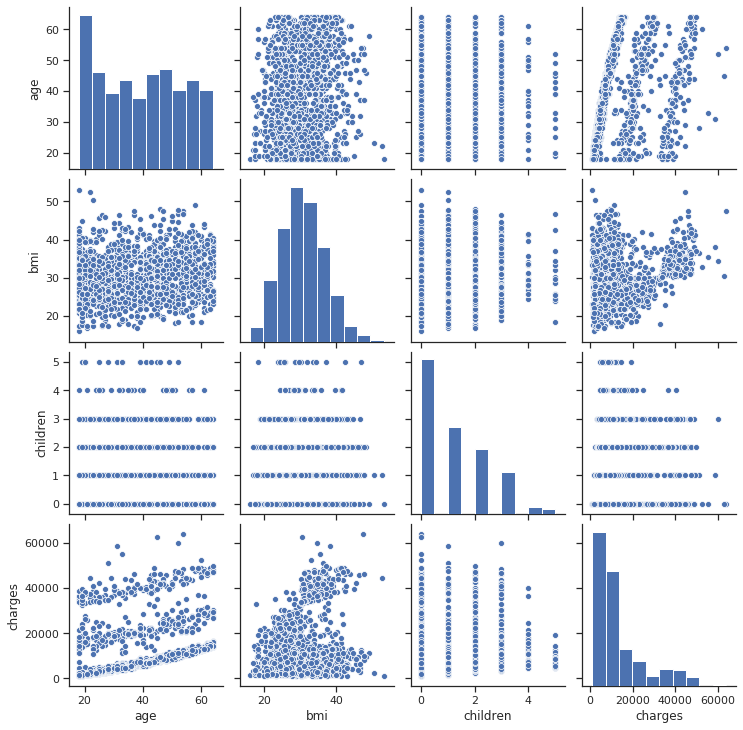

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(userData)

<h3 style="text-decoration: underline;"> Prove the following with statistical evidence </h3>

<h4> Q. Do charges of people who smoke differ significantly from the people who
don't? </h4>

In [13]:
# Hypothesis Testing 

#H0: Beign a smoker/non-smoker wouldn't affect insurance charges.
#Ha: The insurance charges of people who smoke would differ significantly from the people who doesn't.

smoker_Charge = []
nonsmoker_Charge = []

smokerList = userData['smoker'].tolist()
chargesList = userData['charges'].tolist()


# Segregating charges of smokers and non-smokers

for i in range(0, len(smokerList)):
    
    if str(smokerList[i]) == 'yes':
        smoker_Charge.append(chargesList[i])
    else:
        nonsmoker_Charge.append(chargesList[i])

smCharge_arr = np.array(smoker_Charge)
nsmCharge_arr = np.array(nonsmoker_Charge)
        
    
#T-Test with significance level at 5%

t,pVal  = stats.ttest_ind(smCharge_arr, nsmCharge_arr)

if (pVal) < 0.05:  
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is less than the significane level of 5%. This validates our alternate hypothesis.")
    print("\nHence, the charges of people who smoke does differ significantly from the people who doesn't smoke \n")
    
else:
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is greater than the significane level of 5%. This validates our null hypothesis.")
    print("\nHence, the charges of people who smoke are not different from the people who are non-smokers \n")



INFERENCE 

Here the p-value (8.271435842177219e-283) is less than the significane level of 5%. This validates our alternate hypothesis.

Hence, the charges of people who smoke does differ significantly from the people who doesn't smoke 



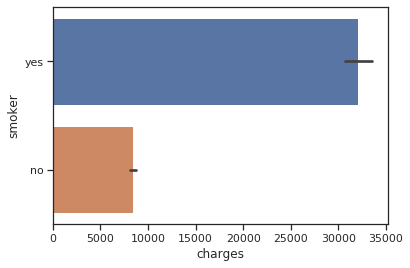

In [14]:
#Plotting charges of smokes vs non-smokers

sm_vs_nsm = sns.barplot(userData['charges'], userData['smoker'])
sm_vs_nsm

The above plot supports the inference of hypothesis testing

<h4> Q. Does bmi of males differ significantly from that of females? </h4>

In [15]:
# Hypothesis Testing 

#H0: Gender doen't affect BMI.
#Ha: Gender has direct imapct on BMI values.

male_bmi = []
female_bmi = []

genderList = userData['sex'].tolist()
bmiList = userData['bmi'].tolist()


# Segregating BMIs of male and female population

for i in range(0, len(genderList)):
    
    if str(genderList[i]) == 'male':
        male_bmi.append(bmiList[i])
    else:
        female_bmi.append(bmiList[i])

male_bmi_arr = np.array(male_bmi)
female_bmi_arr = np.array(female_bmi)
        
    
#T-Test with significance level at 5%

t,pVal  = stats.ttest_ind(male_bmi_arr, female_bmi_arr)

if (pVal) < 0.05:  
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is less than the significane level of 5%. This validates our alternate hypothesis.")
    print("\nHence, the gender does not affect the value of BMI \n")
    
else:
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is greater than the significane level of 5%. This validates our null hypothesis.")
    print("\nHence, the gender does not affect the value of BMI \n")



INFERENCE 

Here the p-value (0.08997637178984932) is greater than the significane level of 5%. This validates our null hypothesis.

Hence, the gender does not affect the value of BMI 



<h4> Q. Is the proportion of smokers significantly different in different genders? </h4>

In [16]:
# Chi Square Test

#H0: Gender does not affect being a smoker or not 
#Ha: Gender does affect being a smoker or not 

smo_gender = pd.crosstab(userData['sex'], userData['smoker'])
chi, pVal, dof, expected =  stats.chi2_contingency(smo_gender)

# Setting our significance level at 5%

if (pVal) < 0.05:  
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is less than the significane level of 5%. This validates our alternate hypothesis.")
    print("\nHence, the gender does affect being a smoker or not \n")
    
else:
    print("\nINFERENCE \n\nHere the p-value (" + str(pVal) + ") is greater than the significane level of 5%. This validates our null hypothesis.")
    print("\nHence, the gender does not affect being a smoker or not \n")



INFERENCE 

Here the p-value (0.006548143503580696) is less than the significane level of 5%. This validates our alternate hypothesis.

Hence, the gender does affect being a smoker or not 



<h4> Q. Is the distribution of bmi across women with no children, one child and two children, the same? </h4>

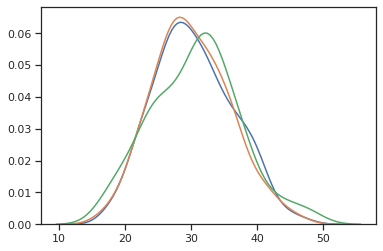

In [17]:
zeroChild_bmi = []
oneChild_bmi = []
twoChild_bmi = []

genderList = userData['sex'].tolist()
bmiList = userData['bmi'].tolist()
childList = userData['children'].tolist()

# Segregating BMIs of male and female population

for i in range(0, len(genderList)):
    
    if str(genderList[i]) == 'female':
        if str(childList[i]) == '0':
            zeroChild_bmi.append(bmiList[i])
        elif str(childList[i]) == '1':
            oneChild_bmi.append(bmiList[i])
        elif str(childList[i]) == '2':
            twoChild_bmi.append(bmiList[i])
    else: 
        pass

zeroChild_bmi_arr = np.array(zeroChild_bmi)
oneChild_bmi_arr = np.array(oneChild_bmi)
twoChild_bmi_arr = np.array(twoChild_bmi)

sns.distplot(zeroChild_bmi_arr, hist=False)
sns.distplot(oneChild_bmi_arr, hist=False)
sns.distplot(twoChild_bmi_arr, hist=False)

Looking at the distribution, BMI is not affected by the number of children